## **Importing libraries**

In [ ]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import load_model

## **Importing images**

### **Creating placeholder arrays**

In [6]:
classes = 5
samples = 100

# Create placeholder arrays  
X = np.zeros((samples*classes, 150, 150))
y = np.zeros(samples*classes)

print(X.shape, y.shape)

(500, 150, 150) (500,)


### **Fetch unseen samples**

In [7]:
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
folders = ["hello", "iloveyou", "no", "sorry", "yes"]

folder_path = "C:\\Users\\visha\\OneDrive\\Documentos\\Code\\endor\\sign_language\\Images\\unseen\\"
file_names = []

# Create a list with all of the images
for f in glob.glob(folder_path + '/**/*', recursive=True):
    if f[-4:] == '.jpg':
        file_names.append(f)
            
print(len(file_names))

500


In [8]:
for i, file in enumerate(file_names):
    image = np.array(Image.open(file).convert('L'))
    X[i] = image

print(X.shape)

(500, 150, 150)


In [9]:
X = X.astype(np.float32)
print(X.shape, X.dtype)

(500, 150, 150) float32


In [10]:
# Create the labels array
# hello: 0, iloveyou: 1, no: 2, sorry: 3, yes: 4
for i in range(classes):
    y[i*samples:i*samples+samples] = i

y = y.astype(np.int64)
print(y.dtype)
print(np.unique(y, return_counts=True))

int64
(array([0, 1, 2, 3, 4], dtype=int64), array([100, 100, 100, 100, 100], dtype=int64))


### **Visualize samples**

Label: 0


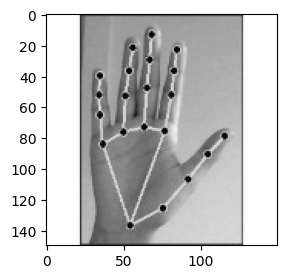

In [11]:
# Visualize a training sample
plt.figure(figsize=(3,3))
plt.imshow(X[0].reshape((150,150)), cmap="gray")
print("Label:", y[0])

Label: 3


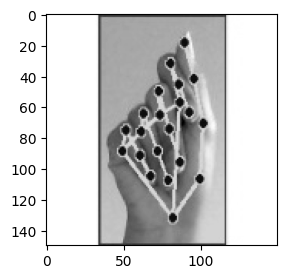

In [12]:
# Visualize a training sample
plt.figure(figsize=(3,3))
plt.imshow(X[334].reshape((150,150)), cmap="gray")
print("Label:", y[334])

## **Evaluating test data**

### **Importing models**

In [88]:
filepath = "C:/Users/visha/OneDrive/Documentos/Code/endor/sign_language/"

model_1 = load_model(f"{filepath}/old_models/Model_V2.keras") 
model_2 = load_model(f"{filepath}/Model/Model_1_13ks.keras")
model_TM = load_model(f"{filepath}/TM_Model/keras_model_2.h5", compile=False)

labels = ["hello", "iloveyou", "no", "sorry", "yes"]
labels_TM = ["yes", "iloveyou", "no", "sorry", "hello"]

### **Plotting function**

In [45]:
def plot_image(i, predictions_array, true_label, img, labels):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(classes))
  plt.yticks([])
  thisplot = plt.bar(range(classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### **Model 1 Performance**

In [46]:
test_loss, test_acc = model_1.evaluate(X,  y, verbose=2)
print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 26.8915 - accuracy: 0.6920 - 402ms/epoch - 25ms/step

Test accuracy: 0.6919999718666077


In [47]:
predictions = model_1.predict(X)

16/16 [==============================] - 0s 11ms/step


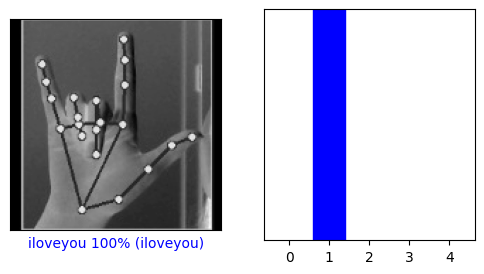

In [48]:
i = 124
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

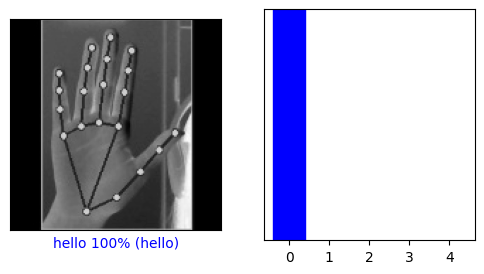

In [49]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

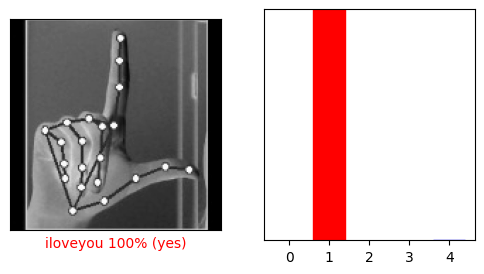

In [50]:
i = 444
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

### **Model 2 Performance**

In [51]:
test_loss, test_acc = model_2.evaluate(X,  y, verbose=2)
print('\nTest accuracy:', test_acc)

16/16 - 0s - loss: 0.8306 - accuracy: 0.7000 - 256ms/epoch - 16ms/step

Test accuracy: 0.699999988079071


In [52]:
predictions = model_2.predict(X)

16/16 [==============================] - 0s 11ms/step


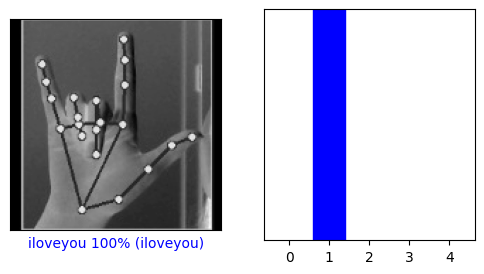

In [53]:
i = 124
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

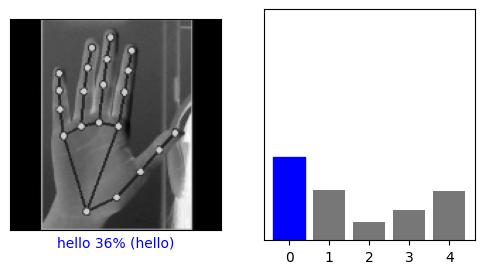

In [54]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

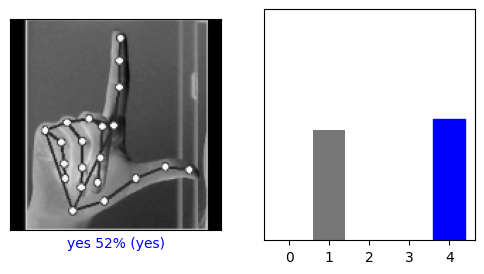

In [55]:
i = 444
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X, labels)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

### **Model TM Performance**

In [71]:
import cv2

X_TM = np.zeros((samples*classes, 224, 224, 3))

for i, file in enumerate(file_names):
    image = cv2.imread(file)
    image = cv2.resize(image, (224, 224), interpolation=cv2.INTER_AREA)
    image = np.asarray(image, dtype=np.float32).reshape(1, 224, 224, 3)
    X_TM[i] = image

print(X_TM.shape)

(500, 224, 224, 3)


In [103]:
# labels_TM = ["yes", "iloveyou", "no", "sorry", "hello"]
y_TM = np.zeros_like(y)

y_TM[0:100] = 4
y_TM[100:200] = 1
y_TM[200:300] = 2
y_TM[300:400] = 3
y_TM[400:-1] = 0

y_TM = y_TM.astype(np.int64)
print(y_TM.dtype)
print(np.unique(y_TM, return_counts=True))

int64
(array([0, 1, 2, 3, 4], dtype=int64), array([100, 100, 100, 100, 100], dtype=int64))


In [105]:
from cvzone.ClassificationModule import Classifier
classifier = Classifier(f"{filepath}/TM_Model/keras_model_2.h5", f"{filepath}/TM_Model/labels_2.txt")
acc = 0
predictions_TM = []

for i in range(X_TM.shape[0]):
    pred, index = classifier.getPrediction(X_TM[i])
    if index == y_TM[i]:
        acc += 1
    predictions_TM.append(pred)

1/1 [==============================] - 0s 22ms/step


In [106]:
acc /= X_TM.shape[0]
print(acc)

0.828


In [ ]:
def plot_image(i, predictions_array, true_label, img, labels):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(classes))
  plt.yticks([])
  thisplot = plt.bar(range(classes), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


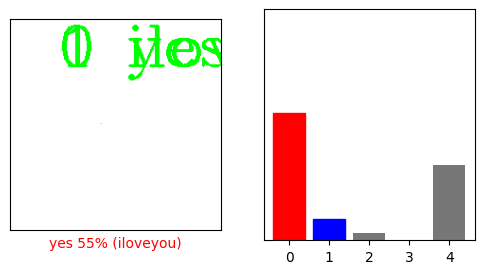

In [111]:
i = 124
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_TM[i], y_TM, X_TM, labels_TM)
plt.subplot(1,2,2)
plot_value_array(i, predictions_TM[i],  y_TM)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


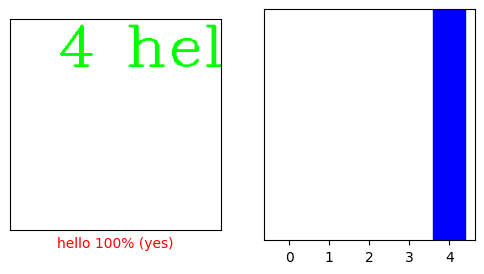

In [108]:
i = 45
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions_TM[i], y, X_TM, labels_TM)
plt.subplot(1,2,2)
plot_value_array(i, predictions_TM[i],  y_TM)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [1.0..255.0].


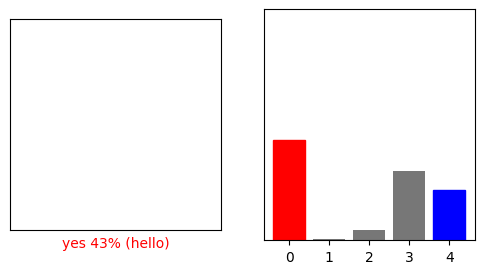

In [97]:
i = 444
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y, X_TM, labels_TM)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y)
plt.show()

In [112]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 700)               15750700  
                                                                 
 dense_1 (Dense)             (None, 300)               210300    
                                                                 
 dense_2 (Dense)             (None, 70)                21070     
                                                                 
 dense_3 (Dense)             (None, 5)                 355       
                                                                 
Total params: 15,982,425
Trainable params: 15,982,425
Non-trainable params: 0
_________________________________________________________________


In [113]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22500)             0         
                                                                 
 dense (Dense)               (None, 800)               18000800  
                                                                 
 dense_1 (Dense)             (None, 70)                56070     
                                                                 
 dense_2 (Dense)             (None, 5)                 355       
                                                                 
Total params: 18,057,225
Trainable params: 18,057,225
Non-trainable params: 0
_________________________________________________________________


In [114]:
model_TM.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_3 (Sequential)   (None, 5)                 128600    
                                                                 
Total params: 538,808
Trainable params: 524,728
Non-trainable params: 14,080
_________________________________________________________________
